<CENTER>
    <a href="http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html" class="icons"><img src="../../images/ATLASOD.gif" style="width:40%"></a>
</CENTER>

# A more difficult notebook in python

#### The following analysis is searching for events where one or two [Z bosons](https://en.wikipedia.org/wiki/W_and_Z_bosons) decay to two ((or four!) leptons of same flavour and opposite charge (to be seen for example in the [Feynman diagram](https://en.wikipedia.org/wiki/Feynman_diagram)).

<CENTER><img src="../../images/Z_ElectronPositron.png" style="width:30%"></CENTER>
or 
<CENTER><img src="../../images/fig01a.png" style="width:30%"></CENTER>

First of all - like we did it in the first notebook - ROOT is imported to read the files in the _.root_ data format.

In [1]:
import ROOT

Welcome to JupyROOT 6.24/06


In order to activate the interactive visualisation of the histogram that is later created we can use the JSROOT magic:

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file.

In [2]:
## CHOOSE here which sample to use!!

## 2lep
f = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/Data/data_A.1largeRjet1lep.root") ## 13 TeV sample
g = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/Data/data_B.1largeRjet1lep.root")
h = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/Data/data_C.1largeRjet1lep.root")
p = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/Data/data_D.1largeRjet1lep.root")
## 4lep
#f = ROOT.TFile.Open("http://opendata.cern.ch/eos/opendata/atlas/OutreachDatasets/2020-01-22/4lep/MC/mc_363490.llll.4lep.root") ## 4 lepton 13 TeV sample

After the data is opened we create a canvas on which we can draw a histogram. If we do not have a canvas we cannot see our histogram at the end. Its name is _Canvas_ and its header is _c_. The two following arguments define the width and the height of the canvas.

In [3]:
canvas = ROOT.TCanvas("Canvas","c",800,600)

The next step is to define a tree named _t_ to get the data out of the _.root_ file.

In [4]:
tree = f.Get("mini")
tree.GetEntries()

25707

In [5]:
tree1 = g.Get("mini")
tree.GetEntries()

25707

In [6]:
tree2 = h.Get("mini")
tree.GetEntries()

25707

In [7]:
tree3 = p.Get("mini")
tree.GetEntries()

25707

Now we define a histogram that will later be placed on this canvas. Its name is _variable_, the header of the histogram is _Mass of the Z boson_, the x axis is named _mass [GeV]_ and the y axis is named _events_. The three following arguments indicate that this histogram contains 30 bins which have a range from 40 to 140.

In [8]:
hist = ROOT.TH1F("variable","Mass of the Z boson; mass [GeV]; events",30,200,700)

Time to fill our above defined histogram. At first we define some variables and then we loop over the data. We also make some cuts as you can see in the # _comments_.

In [9]:
leadLepton  = ROOT.TLorentzVector()
trailLepton = ROOT.TLorentzVector()

for event in tree:
    
    # Cut #1: At least 2 leptons
    if tree.lep_n >= 2:
        
        # Cut #2: Leptons with opposite charge
        if (tree.lep_charge[0] != tree.lep_charge[1]):
            
            # Cut #3: Leptons of the same family (2 electrons or 2 muons)
            if (tree.lep_type[0] == tree.lep_type[1]):
                
                # Let's define one TLorentz vector for each, e.i. two vectors!
                leadLepton.SetPtEtaPhiE(tree.lep_pt[0]/1000., tree.lep_eta[0], tree.lep_phi[0], tree.lep_E[0]/1000.)
                trailLepton.SetPtEtaPhiE(tree.lep_pt[1]/1000., tree.lep_eta[1], tree.lep_phi[1], tree.lep_E[1]/1000.)
                # Next line: addition of two TLorentz vectors above --> ask mass very easy (devide by 1000 to get value in GeV)
                invmass = leadLepton + trailLepton
                
                hist.Fill(invmass.M())
                


for event in tree1:
    
    # Cut #1: At least 2 leptons
    if tree1.lep_n >= 2:
        
        # Cut #2: Leptons with opposite charge
        if (tree1.lep_charge[0] != tree1.lep_charge[1]):
            
            # Cut #3: Leptons of the same family (2 electrons or 2 muons)
            if (tree1.lep_type[0] == tree1.lep_type[1]):
                
                # Let's define one TLorentz vector for each, e.i. two vectors!
                leadLepton.SetPtEtaPhiE(tree1.lep_pt[0]/1000., tree1.lep_eta[0], tree1.lep_phi[0], tree1.lep_E[0]/1000.)
                trailLepton.SetPtEtaPhiE(tree1.lep_pt[1]/1000., tree1.lep_eta[1], tree1.lep_phi[1], tree1.lep_E[1]/1000.)
                # Next line: addition of two TLorentz vectors above --> ask mass very easy (devide by 1000 to get value in GeV)
                invmass1 = leadLepton + trailLepton
                
                hist.Fill(invmass1.M())
                


for event in tree2:
    
    # Cut #1: At least 2 leptons
    if tree2.lep_n >= 2:
        
        # Cut #2: Leptons with opposite charge
        if (tree2.lep_charge[0] != tree2.lep_charge[1]):
            
            # Cut #3: Leptons of the same family (2 electrons or 2 muons)
            if (tree2.lep_type[0] == tree2.lep_type[1]):
                
                # Let's define one TLorentz vector for each, e.i. two vectors!
                leadLepton.SetPtEtaPhiE(tree2.lep_pt[0]/1000., tree2.lep_eta[0], tree2.lep_phi[0], tree2.lep_E[0]/1000.)
                trailLepton.SetPtEtaPhiE(tree2.lep_pt[1]/1000., tree2.lep_eta[1], tree2.lep_phi[1], tree2.lep_E[1]/1000.)
                # Next line: addition of two TLorentz vectors above --> ask mass very easy (devide by 1000 to get value in GeV)
                invmass2 = leadLepton + trailLepton
                
                hist.Fill(invmass2.M())
                
                


for event in tree3:
    
    # Cut #1: At least 2 leptons
    if tree3.lep_n >= 2:
        
        # Cut #2: Leptons with opposite charge
        if (tree3.lep_charge[0] != tree3.lep_charge[1]):
            
            # Cut #3: Leptons of the same family (2 electrons or 2 muons)
            if (tree3.lep_type[0] == tree3.lep_type[1]):
                
                # Let's define one TLorentz vector for each, e.i. two vectors!
                leadLepton.SetPtEtaPhiE(tree3.lep_pt[0]/1000., tree3.lep_eta[0], tree3.lep_phi[0], tree3.lep_E[0]/1000.)
                trailLepton.SetPtEtaPhiE(tree3.lep_pt[1]/1000., tree3.lep_eta[1], tree3.lep_phi[1], tree3.lep_E[1]/1000.)
                # Next line: addition of two TLorentz vectors above --> ask mass very easy (devide by 1000 to get value in GeV)
                invmass3 = leadLepton + trailLepton
                
                hist.Fill(invmass3.M())

After filling the histogram we want to see the results of the analysis. First we draw the histogram on the canvas and then the canvas on which the histogram lies.

In [10]:
hist.Draw()
hist.SetFillColor(3)

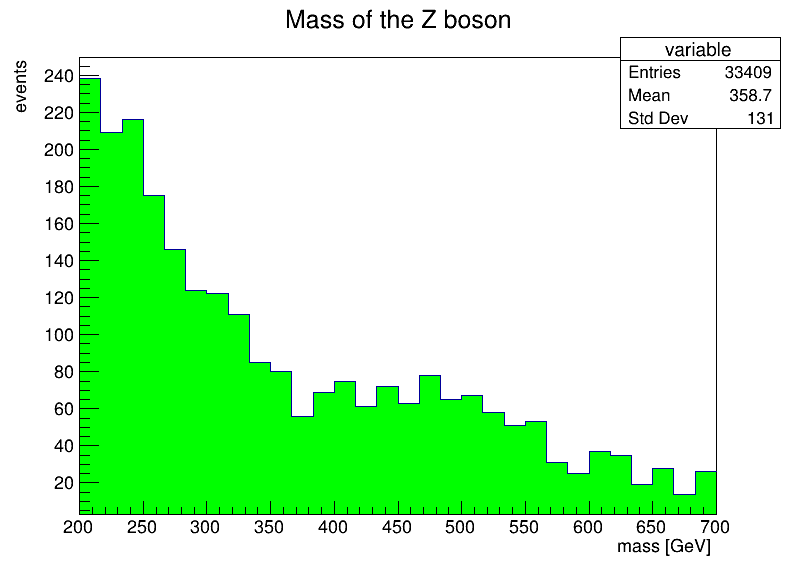

In [11]:
canvas.Draw()

**Done**